# Xgboost Regression

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import math
import datetime
import seaborn as sns;
from sklearn.preprocessing import StandardScaler

### Read Preprocessed Data & Preprocess data for feature Regression

In [2]:
data = pd.read_csv('Security_and_market_movement_unscaled_cluster125.csv')

In [3]:
data.head()

,Unnamed: 0,SecurityID,KeyDate,YieldWorst,ModifiedDuration_Plain,AmtOutstanding,Target_G_change,YieldWorst_change,ModifiedDuration_Plain_change,Group,...,skew_change,swap_change,vix_change,Close_change,slope_change,skew_change_Weekly,swap_change_Weekly,vix_change_Weekly,Close_change_Weekly,slope_change_Weekly
0,0,56535,2019-01-02,26.9747,1.85247,300000000.0,5.22,0.000805,-0.001348,Cluster 83,...,-0.004584,-0.004966,-0.086546,0.001269,-0.238095,0.000000,0.0,0.00000,0.000000,-0.026617
1,1,56535,2019-01-03,26.7432,1.84797,300000000.0,-14.51,-0.008582,-0.002429,Cluster 83,...,-0.042981,0.000000,0.096038,-0.024757,0.062500,0.000000,0.0,0.00000,0.000000,-0.024643
2,2,56535,2019-01-04,26.9556,1.84352,300000000.0,15.61,0.007942,-0.002408,Cluster 83,...,-0.006951,-0.012668,-0.159921,0.034336,0.000000,0.000000,0.0,0.00000,0.000000,-0.034643
3,3,56535,2019-01-07,27.0412,1.84036,300000000.0,-3.60,0.003176,-0.001714,Cluster 83,...,0.019024,0.005443,0.000935,0.007010,0.000000,0.000000,0.0,0.00000,0.000000,-0.025119
4,4,56535,2019-01-08,26.9041,1.83947,300000000.0,-18.33,-0.005070,-0.000484,Cluster 83,...,0.015322,0.020495,-0.043458,0.009695,-0.117647,-0.004034,0.0,-0.03859,0.005511,-0.058648


In [4]:
### Drop the 'Unnamed: 0'
data.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
### Remove the moving average of the market data
data_1 = data.drop(columns = ['skew_change_Weekly','swap_change_Weekly','vix_change_Weekly','Close_change_Weekly','slope_change_Weekly','AmtOutstanding'])

### Read Preprocessed dummy variable

In [6]:
dummy_variable = pd.read_csv('Security_info_post_dummy.csv')

In [7]:
dummy_variable.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
dummy_variable_part1 = dummy_variable.drop(columns=['MinPiece', 'Term', 'RatingSP','MinIncrement'])

In [9]:
dummy_variable_part2 =dummy_variable[['SecurityID','MinPiece', 'Term', 'RatingSP','MinIncrement']]

### Feature Engineering

In [10]:
### Merge the dummy variable to the market&security change
data_1 = data_1.merge(dummy_variable_part2,on=['SecurityID'],how='left')

In [11]:
data_1.KeyDate.unique()

array(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
       '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
       '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
       '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30',
       '2019-01-31', '2019-02-01', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11',
       '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
       '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
       '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
       '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
       '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
       '2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19',
       '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25',
       '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
       '2019-04-01', '2019-04-02', '2019-04-03', '2019-

In [12]:
data_1.head()

,SecurityID,KeyDate,YieldWorst,ModifiedDuration_Plain,Target_G_change,YieldWorst_change,ModifiedDuration_Plain_change,Group,Cluster_average_AmountIssued,Cluster_average_Coupon,...,Cluster_average_ModifiedDuration_Plain_change,skew_change,swap_change,vix_change,Close_change,slope_change,MinPiece,Term,RatingSP,MinIncrement
0,56535,2019-01-02,26.9747,1.85247,5.22,0.000805,-0.001348,Cluster 83,6.380922e+08,4.015979,...,-0.000966,-0.004584,-0.004966,-0.086546,0.001269,-0.238095,200000.0,3,NaN,1000.0
1,56535,2019-01-03,26.7432,1.84797,-14.51,-0.008582,-0.002429,Cluster 83,6.380922e+08,4.015979,...,-0.002828,-0.042981,0.000000,0.096038,-0.024757,0.062500,200000.0,3,NaN,1000.0
2,56535,2019-01-04,26.9556,1.84352,15.61,0.007942,-0.002408,Cluster 83,6.380922e+08,4.015979,...,-0.002305,-0.006951,-0.012668,-0.159921,0.034336,0.000000,200000.0,3,NaN,1000.0
3,56535,2019-01-07,27.0412,1.84036,-3.60,0.003176,-0.001714,Cluster 83,6.380922e+08,4.015979,...,-0.001536,0.019024,0.005443,0.000935,0.007010,0.000000,200000.0,3,NaN,1000.0
4,56535,2019-01-08,26.9041,1.83947,-18.33,-0.005070,-0.000484,Cluster 83,6.380922e+08,4.015979,...,-0.001538,0.015322,0.020495,-0.043458,0.009695,-0.117647,200000.0,3,NaN,1000.0


In [13]:
data_1["RatingSP"] = data_1['RatingSP'].fillna(data_1.groupby('Group')['RatingSP'].transform('mean'))

In [14]:
data_1['KeyDate'] = pd.to_datetime(data_1['KeyDate'])

In [15]:
type(data_1['KeyDate'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

###Select a given period:
data_1 = data_1[(data_1['KeyDate']>= datetime.datetime(2018,12,31))&(data_1['KeyDate']<= datetime.datetime(2019,2,28))]

In [16]:
data_1.head()

,SecurityID,KeyDate,YieldWorst,ModifiedDuration_Plain,Target_G_change,YieldWorst_change,ModifiedDuration_Plain_change,Group,Cluster_average_AmountIssued,Cluster_average_Coupon,...,Cluster_average_ModifiedDuration_Plain_change,skew_change,swap_change,vix_change,Close_change,slope_change,MinPiece,Term,RatingSP,MinIncrement
0,56535,2019-01-02,26.9747,1.85247,5.22,0.000805,-0.001348,Cluster 83,6.380922e+08,4.015979,...,-0.000966,-0.004584,-0.004966,-0.086546,0.001269,-0.238095,200000.0,3,15.49823,1000.0
1,56535,2019-01-03,26.7432,1.84797,-14.51,-0.008582,-0.002429,Cluster 83,6.380922e+08,4.015979,...,-0.002828,-0.042981,0.000000,0.096038,-0.024757,0.062500,200000.0,3,15.49823,1000.0
2,56535,2019-01-04,26.9556,1.84352,15.61,0.007942,-0.002408,Cluster 83,6.380922e+08,4.015979,...,-0.002305,-0.006951,-0.012668,-0.159921,0.034336,0.000000,200000.0,3,15.49823,1000.0
3,56535,2019-01-07,27.0412,1.84036,-3.60,0.003176,-0.001714,Cluster 83,6.380922e+08,4.015979,...,-0.001536,0.019024,0.005443,0.000935,0.007010,0.000000,200000.0,3,15.49823,1000.0
4,56535,2019-01-08,26.9041,1.83947,-18.33,-0.005070,-0.000484,Cluster 83,6.380922e+08,4.015979,...,-0.001538,0.015322,0.020495,-0.043458,0.009695,-0.117647,200000.0,3,15.49823,1000.0


data_1 = data_1.groupby('SecurityID').agg(np.random.choice)

In [17]:
final_regression_data = data_1.loc[:,'ModifiedDuration_Plain':'RatingSP']

In [18]:
final_regression_data.dropna(inplace=True)

In [19]:
final_regression_data.columns

Index(['ModifiedDuration_Plain', 'Target_G_change', 'YieldWorst_change',
       'ModifiedDuration_Plain_change', 'Group',
       'Cluster_average_AmountIssued', 'Cluster_average_Coupon',
       'Cluster_average_Term', 'Cluster_average_Rating',
       'Jr Subordinated Unsecured', 'Secured', 'Sr Unsecured',
       'Subordinated Unsecured', '1st Lien Secured', '2nd Lien Secured',
       '3rd Lien Secured', '1st lien', 'Asset Backed', 'Cluster_G_change',
       'Cluster_average_YieldWorst_change',
       'Cluster_average_ModifiedDuration_Plain_change', 'skew_change',
       'swap_change', 'vix_change', 'Close_change', 'slope_change', 'MinPiece',
       'Term', 'RatingSP'],
      dtype='object')

In [20]:
final_regression_data.replace([np.inf, -np.inf], np.NaN, inplace=True)
final_regression_data.dropna(inplace=True)

### Set the Target and the Features

In [21]:
Y = final_regression_data['Target_G_change']
X = final_regression_data.drop(columns =['Target_G_change','Group'])

In [22]:
removed_outliers = Y.between(Y.quantile(.01), Y.quantile(.99))

In [23]:
final_regression_data_head = data_1[['SecurityID','KeyDate']]

### Remove Outliers in the period
We Select the 5 Percentile to 95 percentile

In [24]:
removed_outliers = Y.between(Y.quantile(.01), Y.quantile(.99))

In [25]:
print(removed_outliers.value_counts())

True     3349188
False      68346
Name: Target_G_change, dtype: int64


In [26]:
X = X[removed_outliers]
Y = Y[removed_outliers]

In [27]:
columns = X.columns
index = X.index

In [28]:
transformer = StandardScaler().fit(X)
X = transformer.transform(X)

In [29]:
X = pd.DataFrame(data=X,    # values
    index=index,    # 1st column as index
columns=columns)

In [30]:
X = pd.merge(final_regression_data_head, X, left_index=True, right_index=True)

In [31]:
X.head()

,SecurityID,KeyDate,ModifiedDuration_Plain,YieldWorst_change,ModifiedDuration_Plain_change,Cluster_average_AmountIssued,Cluster_average_Coupon,Cluster_average_Term,Cluster_average_Rating,Jr Subordinated Unsecured,...,Cluster_average_YieldWorst_change,Cluster_average_ModifiedDuration_Plain_change,skew_change,swap_change,vix_change,Close_change,slope_change,MinPiece,Term,RatingSP
0,56535,2019-01-02,-0.881861,0.126263,-0.028705,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,-0.062499,0.147293,-0.272570,-0.135764,-1.129489,0.031595,-0.841534,1.473639,-0.990365,0.064759
1,56535,2019-01-03,-0.882788,-0.397132,-0.260859,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,-0.530052,-0.919563,-2.175207,0.060375,1.229473,-3.301233,0.157112,1.473639,-0.990365,0.064759
2,56535,2019-01-04,-0.883705,0.524201,-0.256320,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,0.679026,-0.620243,-0.389837,-0.440000,-2.077485,4.266232,-0.050528,1.473639,-0.990365,0.064759
3,56535,2019-01-07,-0.884356,0.258432,-0.107355,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,0.163505,-0.179291,0.897223,0.275380,0.000761,0.766915,-0.050528,1.473639,-0.990365,0.064759
4,56535,2019-01-08,-0.884539,-0.201312,0.156796,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,0.280170,-0.180424,0.713814,0.869918,-0.572796,1.110741,-0.441378,1.473639,-0.990365,0.064759


In [32]:
dummy_variable_part1

,SecurityID,1.5 Lien Secured,1st Lien Secured,1st lien,2nd Lien Secured,3rd Lien Secured,Asset Backed,Jr Subordinated Unsecured,Secured,Sr Unsecured,...,FIXED,FLAT TRADING,FLOATING,FUNGED,Fixed,PAY-IN-KIND,STEP CPN,VARIABLE,WHEN ISSUED,ZERO COUPON
0,62,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,64,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,69,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,72,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28971,72948,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
28972,72949,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28973,72950,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28974,72951,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
X = X.merge(dummy_variable_part1,on='SecurityID',how='left')

In [34]:
X.head()

,SecurityID,KeyDate,ModifiedDuration_Plain,YieldWorst_change,ModifiedDuration_Plain_change,Cluster_average_AmountIssued,Cluster_average_Coupon,Cluster_average_Term,Cluster_average_Rating,Jr Subordinated Unsecured_x,...,FIXED,FLAT TRADING,FLOATING,FUNGED,Fixed,PAY-IN-KIND,STEP CPN,VARIABLE,WHEN ISSUED,ZERO COUPON
0,56535,2019-01-02,-0.881861,0.126263,-0.028705,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,1,0,0,0,0,0,0,0,0,0
1,56535,2019-01-03,-0.882788,-0.397132,-0.260859,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,1,0,0,0,0,0,0,0,0,0
2,56535,2019-01-04,-0.883705,0.524201,-0.256320,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,1,0,0,0,0,0,0,0,0,0
3,56535,2019-01-07,-0.884356,0.258432,-0.107355,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,1,0,0,0,0,0,0,0,0,0
4,56535,2019-01-08,-0.884539,-0.201312,0.156796,-0.813629,-1.739785,-0.663244,1.74941,-0.475642,...,1,0,0,0,0,0,0,0,0,0


In [35]:
X = X.loc[:,'ModifiedDuration_Plain':'ZERO COUPON']

In [36]:
print(len(X),len(Y))

3349188 3349188


In [37]:
### Split the X,Y to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

In [38]:
### set up the the xgb regression
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth =100, alpha = 100, n_estimators = 100)

In [39]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
preds = xg_reg.predict(X_test)
pred_train= xg_reg.predict(X_train)

In [41]:
rmse_test = np.sqrt(mean_squared_error(y_test, preds))
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE Test: %f" % (rmse_test))
print("RMSE Train: %f" % (rmse_train))
r2_test = r2_score(y_test, preds)
r2_train = r2_score(y_train,pred_train)
print("Test R2:{}".format(r2_test))
print("Train R2:{}".format(r2_train))

RMSE Test: 3.364214
RMSE Train: 3.206286
Test R2:0.7111318447647343
Train R2:0.7365249248656061


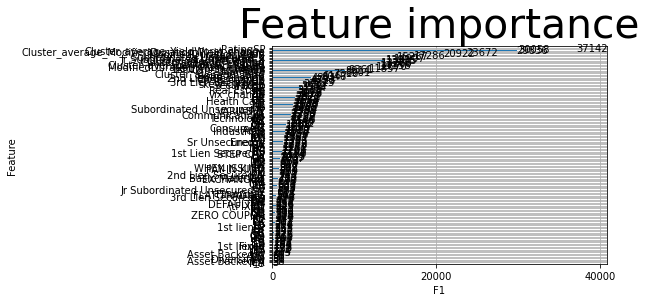

In [42]:
import matplotlib as mpl
xgb.plot_importance(xg_reg)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [500, 500]
plt.rcParams.update({'font.size': 34})
plt.title('Feature importance')
plt.xlabel('F1')
plt.ylabel('Feature')
plt.show()

In [43]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0,rankdir='LR')
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [46]:
columns

Index(['ModifiedDuration_Plain', 'YieldWorst_change',
       'ModifiedDuration_Plain_change', 'Cluster_average_AmountIssued',
       'Cluster_average_Coupon', 'Cluster_average_Term',
       'Cluster_average_Rating',
       'Cluster Perecentage of Jr Subordinated Unsecured',
       'Cluster Perecentage of Secured', 'Cluster Perecentage of Unsecured',
       'Cluster Perecentage of Subordinated Unsecured',
       'Cluster Perecentage of 1st Lien Secured',
       'Cluster Perecentage of 2nd Lien Secured',
       'Cluster Perecentage of 3rd Lien Secured',
       'Cluster Perecentage of 1st Lien',
       'Cluster Perecentage of Asset Backed', 'Cluster_G_change',
       'Cluster_average_YieldWorst_change',
       'Cluster_average_ModifiedDuration_Plain_change', 'skew_change',
       'swap_change', 'vix_change', 'Close_change', 'slope_change', 'MinPiece',
       'Term', 'RatingSP'],
      dtype='object')

### After Feature Importance

new_X = X[['YieldWorst_change','vix_change','swap_change','Cluster_average_YieldWorst_change','Cluster_average_Rating','Cluster_average_ModifiedDuration_Plain_change','Close_change','MinIncrement','ModifiedDuration_Plain_change','Cluster Perecentage of Secured','Cluster_average_Coupon','slope_change','Cluster_G_change','skew_change','DEFAULTED','Term','Cluster_average_Term']]

new_X.tail()

X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.33, random_state=10)

xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth =100, alpha = 100, n_estimators = 50)

xg_reg2.fit(X_train,y_train)

preds = xg_reg2.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
r2 = r2_score(y_test, preds)
print("R2:{}".format(r2))

import matplotlib as mpl
xgb.plot_importance(xg_reg2)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [200, 200]
plt.rcParams.update({'font.size': 34})
plt.title('Feature importance')
plt.xlabel('F1')
plt.ylabel('Feature')
plt.show()

import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg2,num_trees=0,rankdir='LR')
plt.rcParams['figure.figsize'] = [1000, 1000]
plt.show()

GLM

In [47]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.01)
reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [48]:
preds = reg.predict(X_test)
pred_train= reg.predict(X_train)

In [49]:
rmse_test = np.sqrt(mean_squared_error(y_test, preds))
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE Test: %f" % (rmse_test))
print("RMSE Train: %f" % (rmse_train))
r2_test = r2_score(y_test, preds)
r2_train = r2_score(y_train,pred_train)
print("R2 Test:{}".format(r2_test))
print("R2 Train:{}".format(r2_train))

RMSE Test: 5.139244
RMSE Train: 4.618683
R2 Test:0.3258897326272847
R2 Train:0.4532721051537346


X.corr()

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(random_state=42, max_iter=100).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [51]:
preds = regr.predict(X_test)
pred_train= regr.predict(X_train)

In [52]:
rmse_test = np.sqrt(mean_squared_error(y_test, preds))
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE Test: %f" % (rmse_test))
print("RMSE Train: %f" % (rmse_train))
r2_test = r2_score(y_test, preds)
r2_train = r2_score(y_train,pred_train)
print("R2 Test:{}".format(r2_test))
print("R2 Train:{}".format(r2_train))

RMSE Test: 2.425726
RMSE Train: 2.390526
R2 Test:0.8498186062506645
R2 Train:0.8535390359439413


In [53]:
regr.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}